## 2. Combined building damage

### 2.1 Wind building damage

In [8]:
# Building Wind Fragility mapping
mapping_id = "62fef3a6cef2881193f2261d"
fragility_service = FragilityService(client)
mapping_set = MappingSet(fragility_service.get_mapping(mapping_id))

In [9]:
# wind building damage
w_bldg_dmg = BuildingDamage(client)
w_bldg_dmg.load_remote_input_dataset("buildings", bldg_dataset_id)
w_bldg_dmg.set_input_dataset('dfr3_mapping_set', mapping_set)
w_bldg_dmg.set_parameter("result_name", "Galveston-wind-dmg")
w_bldg_dmg.set_parameter("hazard_type", hazard_type)
w_bldg_dmg.set_parameter("hazard_id", hazard_id)
w_bldg_dmg.set_parameter("num_cpu", 8)
w_bldg_dmg.run_analysis()

True

### 2.2 Surge-Wave building damage

In [10]:
# Surge-wave mapping
mapping_id = "6303e51bd76c6d0e1f6be080"
mapping_set = MappingSet(fragility_service.get_mapping(mapping_id))

In [11]:
# surge-wave building damage
sw_bldg_dmg = BuildingDamage(client)
sw_bldg_dmg.load_remote_input_dataset("buildings", bldg_dataset_id)
sw_bldg_dmg.set_input_dataset('dfr3_mapping_set', mapping_set)
sw_bldg_dmg.set_parameter("result_name", "Galveston-sw-dmg")
sw_bldg_dmg.set_parameter("hazard_type", hazard_type)
sw_bldg_dmg.set_parameter("hazard_id", hazard_id)
sw_bldg_dmg.set_parameter("num_cpu", 8)
sw_bldg_dmg.run_analysis()

Dataset already exists locally. Reading from local cached zip.
Unzipped folder found in the local cache. Reading from it...


True

### 2.3 Inundation (flood) building damage

In [12]:
# flood mapping
mapping_id = "62fefd688a30d30dac57bbd7"
mapping_set = MappingSet(fragility_service.get_mapping(mapping_id))

In [13]:
# flood building damage
f_bldg_dmg = BuildingDamage(client)
f_bldg_dmg.load_remote_input_dataset("buildings", bldg_dataset_id)
f_bldg_dmg.set_input_dataset('dfr3_mapping_set', mapping_set)
f_bldg_dmg.set_parameter("result_name", "Galveston-flood-dmg")
f_bldg_dmg.set_parameter("hazard_type", hazard_type)
f_bldg_dmg.set_parameter("hazard_id", hazard_id)
f_bldg_dmg.set_parameter("num_cpu", 8)
f_bldg_dmg.run_analysis()

Dataset already exists locally. Reading from local cached zip.
Unzipped folder found in the local cache. Reading from it...


True

### 2.4 Combine wind, surge-wave and flood building damage

#### 2.4.1 Hazard exposure example: surge-wave

In [14]:
surge_wave_damage = sw_bldg_dmg.get_output_dataset("ds_result")
wind_damage = w_bldg_dmg.get_output_dataset("ds_result")
flood_damage = f_bldg_dmg.get_output_dataset("ds_result")
#surge_wave_damage.get_dataframe_from_csv(low_memory=False)

data = surge_wave_damage.get_dataframe_from_csv(low_memory=False)
yes_count = len(data[data['haz_expose'] == 'yes'])
partial_count = len(data[data['haz_expose'] == 'partial'])
sum_count = yes_count + partial_count
total_rows = len(data)

print('Count of "yes":', yes_count)
print('Count of "partial":', partial_count)
print('Sum of "yes" and "partial":', sum_count)
print('Total number of rows:', total_rows)

Count of "yes": 26278
Count of "partial": 744
Sum of "yes" and "partial": 27022
Total number of rows: 29541


#### 2.4.2 Combined damage: setup

In [15]:
combined_bldg_dmg = CombinedWindWaveSurgeBuildingDamage(client)
result_name = "Galveston-combined-dmg"
combined_bldg_dmg.set_input_dataset("surge_wave_damage", surge_wave_damage)
combined_bldg_dmg.set_input_dataset("wind_damage", wind_damage)
combined_bldg_dmg.set_input_dataset("flood_damage", flood_damage)
combined_bldg_dmg.set_parameter("result_name", result_name)
combined_bldg_dmg.run_analysis()

True

#### 2.4.3 Hazard exposure example: combined

In [16]:
combined_dmg = combined_bldg_dmg.get_output_dataset("ds_result")
combined_dmg_df = combined_dmg.get_dataframe_from_csv(low_memory=False)

# Display top 5 rows of output data
combined_dmg_df.head()
combined_dmg_df.to_csv('combined_dmg_df.csv', index=False)

data = combined_dmg_df
yes_count = len(data[data['haz_expose'] == 'yes'])
partial_count = len(data[data['haz_expose'] == 'partial'])
sum_count = yes_count + partial_count
total_rows = len(data)

print('Count of "yes":', yes_count)
print('Count of "partial":', partial_count)
print('Sum of "yes" and "partial":', sum_count)
print('Total number of rows:', total_rows)

Count of "yes": 29526
Count of "partial": 11
Sum of "yes" and "partial": 29537
Total number of rows: 29541


### 2.5 Archetype mapping

In [17]:
buildings = Dataset.from_data_service(bldg_dataset_id, data_service)
bldg_gdf = buildings.get_dataframe_from_shapefile()
bldg_gdf.head()

Dataset already exists locally. Reading from local cached zip.
Unzipped folder found in the local cache. Reading from it...


,strctid,parid,struct_typ,year_built,no_stories,a_stories,b_stories,bsmt_type,sq_foot,gsq_foot,...,ffe_elev,g_elev,archetype,arch_wind,arch_flood,arch_sw,csv_guid,csv_sector,csv_val_st,geometry
0,STf3a21b5f-0334-4d77-911f-faa9a45c92d7,0,NaN,1980,2,0,0,0,47927,0,...,3.76991,3.46511,0,15,6,15,NaN,NaN,NaN,POINT (-94.81680 29.31409)
1,ST80ab0289-8c72-4699-b12b-08ef2f2a5c91,0,NaN,1954,1,0,0,0,100796,0,...,2.26048,1.95568,0,15,6,15,NaN,NaN,NaN,POINT (-94.82295 29.29635)
2,ST7916eaa8-0bfa-4b32-84ff-20f19a520f5c,0,NaN,1970,1,0,0,0,27121,0,...,2.68011,2.37531,0,15,6,15,7916eaa8-0bfa-4b32-84ff-20f19a520f5c,IRetail,2435054.5,POINT (-94.82423 29.29098)
3,ST79008971-a534-4e45-9e40-43a2a904e59b,0,NaN,2002,1,0,0,0,126333,0,...,2.91465,2.60985,0,15,6,15,79008971-a534-4e45-9e40-43a2a904e59b,IProfSer,4483599,POINT (-94.84045 29.29117)
4,ST2ad8ab6f-057f-468e-9911-6e92d9d4d01f,0,NaN,2002,1,0,0,0,114544,0,...,3.73770,3.43290,0,15,6,15,2ad8ab6f-057f-468e-9911-6e92d9d4d01f,IRealE,282702.06,POINT (-94.84242 29.29059)


In [18]:
arch_mapping = Dataset.from_data_service("63dc1f1362b9d001e6a1b485", data_service).get_dataframe_from_csv()
arch_mapping

,arch_wind,category,cluster
0,12.0,Critical Facilities,Critical Medical - Acute Care Hospitals
1,14.0,Critical Facilities,Emergency Operations Centers
2,11.0,Critical Facilities,Critical Government - First Responder Facilities
3,NaN,Critical Facilities,"Non-ambulatory Facilities - Prisons, nursing h..."
4,NaN,Emergency Housing,Emergency Shelters
5,NaN,Emergency Housing,Residential Housing
6,NaN,Emergency Housing,SFH and Multi-family
7,NaN,Housing / Neighborhood,Critical Retail
8,13.0,Housing / Neighborhood,Religious and Spiritual Centers
9,1.0,Housing / Neighborhood,Residential Housing


In [19]:
max_dmg_state_df = DataProcessUtil.get_max_damage_state(combined_dmg_df)
max_dmg_state_df

,guid,max_prob,max_state
0,f3a21b5f-0334-4d77-911f-faa9a45c92d7,0.656011,DS_0
1,80ab0289-8c72-4699-b12b-08ef2f2a5c91,0.711510,DS_2
2,7916eaa8-0bfa-4b32-84ff-20f19a520f5c,0.896200,DS_0
3,79008971-a534-4e45-9e40-43a2a904e59b,0.695918,DS_0
4,2ad8ab6f-057f-468e-9911-6e92d9d4d01f,0.575940,DS_0
...,...,...,...
29536,1ac5be10-582c-46b2-91ed-469f684bb886,0.999993,DS_3
29537,fbcfb6d6-de13-42fa-9839-d7c80afc651d,0.357067,DS_2
29538,2ee961c9-cd94-499e-b1fe-3e0220a440ea,0.545299,DS_2
29539,fa15cfbc-8a60-4a3f-b40f-7a6fada625b9,0.678298,DS_0


In [20]:
ret_json = DataProcessUtil.create_mapped_dmg_result(bldg_gdf, max_dmg_state_df, arch_mapping, "max_state", "arch_wind")
ret_json

{'by_cluster': [{'category': 'Critical Facilities',
   'cluster': 'Critical Medical - Acute Care Hospitals',
   'DS_0': 10,
   'DS_1': 5,
   'DS_2': 0,
   'DS_3': 0},
  {'category': 'Critical Facilities',
   'cluster': 'Emergency Operations Centers',
   'DS_0': -1,
   'DS_1': -1,
   'DS_2': -1,
   'DS_3': -1},
  {'category': 'Critical Facilities',
   'cluster': 'Critical Government - First Responder Facilities',
   'DS_0': -1,
   'DS_1': -1,
   'DS_2': -1,
   'DS_3': -1},
  {'category': 'Critical Facilities',
   'cluster': 'Non-ambulatory Facilities - Prisons, nursing homes, etc.',
   'DS_0': -1,
   'DS_1': -1,
   'DS_2': -1,
   'DS_3': -1},
  {'category': 'Emergency Housing ',
   'cluster': 'Emergency Shelters',
   'DS_0': -1,
   'DS_1': -1,
   'DS_2': -1,
   'DS_3': -1},
  {'category': 'Emergency Housing ',
   'cluster': 'Residential Housing',
   'DS_0': -1,
   'DS_1': -1,
   'DS_2': -1,
   'DS_3': -1},
  {'category': 'Emergency Housing ',
   'cluster': 'SFH and Multi-family',
   'DS

In [21]:
merged_gdf = bldg_gdf[['guid', 'geometry']].merge(max_dmg_state_df, left_on='guid', right_on='guid')
merged_gdf

,guid,geometry,max_prob,max_state
0,f3a21b5f-0334-4d77-911f-faa9a45c92d7,POINT (-94.81680 29.31409),0.656011,DS_0
1,80ab0289-8c72-4699-b12b-08ef2f2a5c91,POINT (-94.82295 29.29635),0.711510,DS_2
2,7916eaa8-0bfa-4b32-84ff-20f19a520f5c,POINT (-94.82423 29.29098),0.896200,DS_0
3,79008971-a534-4e45-9e40-43a2a904e59b,POINT (-94.84045 29.29117),0.695918,DS_0
4,2ad8ab6f-057f-468e-9911-6e92d9d4d01f,POINT (-94.84242 29.29059),0.575940,DS_0
...,...,...,...,...
29536,1ac5be10-582c-46b2-91ed-469f684bb886,POINT (-94.78968 29.28593),0.999993,DS_3
29537,fbcfb6d6-de13-42fa-9839-d7c80afc651d,POINT (-94.79154 29.28914),0.357067,DS_2
29538,2ee961c9-cd94-499e-b1fe-3e0220a440ea,POINT (-94.78782 29.29591),0.545299,DS_2
29539,fa15cfbc-8a60-4a3f-b40f-7a6fada625b9,POINT (-94.79564 29.29522),0.678298,DS_0


### 2.6 Plot results

#### 2.6.1 Combined building damage

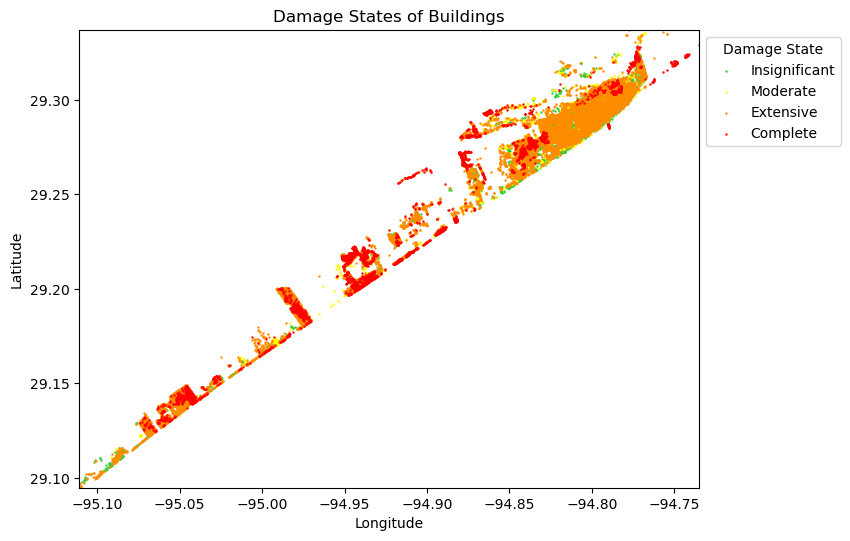

In [22]:
# Rename 'max_state' values for the legend
merged_gdf['max_state'] = merged_gdf['max_state'].replace({'DS_0': 'Insignificant',
                                                           'DS_1': 'Moderate',
                                                           'DS_2': 'Extensive',
                                                           'DS_3': 'Complete'})

# Define colors for each 'max_state'
colors = {'Insignificant': 'limegreen', 'Moderate': 'yellow', 'Extensive': 'darkorange', 'Complete': 'red'}

# Function to plot the data with different colors for each 'max_state'
def plot_data(point_size, use_basemap=True):
    # Plotting
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.set_facecolor('white')  # Set axes background to white

    # Determine bounds from the data
    bounds = merged_gdf.total_bounds
    ax.set_xlim([bounds[0], bounds[2]])
    ax.set_ylim([bounds[1], bounds[3]])

    # Plot each category with its color
    for state, color in colors.items():
        data_to_plot = merged_gdf[merged_gdf['max_state'] == state]
        data_to_plot.plot(ax=ax, markersize=point_size, color=color, label=state)

    # Add basemap if requested
    if use_basemap:
        try:
            ctx.add_basemap(ax, crs=merged_gdf.crs.to_string(), source=ctx.providers.CartoDB.Positron)
        except Exception as e:
            print(f"Failed to load basemap: {e}")

    # Add legend and labels
    plt.legend(title='Damage State', loc='upper left', bbox_to_anchor=(1, 1))
    plt.title('Damage States of Buildings')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')

    # Show plot
    plt.show()

# Example usage
plot_data(point_size=0.5, use_basemap=False)

#### 2.6.2 Paper figure

<img src="https://ars.els-cdn.com/content/image/1-s2.0-S2772741623000388-gr4_lrg.jpg" width="700"/>